<center><h1> Série de Travaux Pratiques N° 7 - Machine Learning </h1></center>
<center><h2> K-Nearest Neighbor and Decision Tree</h2></center>

---



Pour ce TP, on utilisera le **dataset IRIS**. Ce dernier est une base de données regroupant les caractéristiques de **trois espèces de fleurs d’Iris, à savoir Setosa, Versicolour et Virginica**. Chaque ligne de ce jeu de données est une observation des caractéristiques d’une fleur d’Iris. Ce dataset décrit les espèces d’Iris par quatre propriétés : longueur et largeur de sépales ainsi que longueur et largeur de pétales. La base de données comporte 150 observations (50 observations par espèce).

# **Partie I : K-Nearest Neighbor**

# **Questions :**

1- Importer les packages nécessaires

2- Lire l'ensemble de données dans le dataframe pandas

3- Afficher et explorer l'ensemble de données "**iris.csv**"

4- Extraire les variables d'entrée X

5- Extraire les variables de sortie y

6- Diviser le dataset en Train / Test

7- Mise à l'échelle des fonctionnalités avec Transform()

8- Définir votre modèle **KNN**

9- Entraîner le modèle

10- Prédiction sur l'ensemble de test

11- Évaluation du modèle à l'aide de métriques

In [37]:
# IRIS Dataset : KNN


# 1- Importer les packages nécessaires

# 2- Lire l'ensemble de données dans le dataframe pandas

# 3- Afficher et explorer l'ensemble de données "**iris.csv**"

# 4- Extraire les variables d'entrée X

# 5- Extraire les variables de sortie y

# 6- Diviser le dataset en Train / Test

# 7- Mise à l'échelle des fonctionnalités avec Transform()

# 8- Définir votre modèle KNN

# 9- Entraîner le modèle

# 10- Prédiction sur l'ensemble de test

# 11- Évaluation du modèle à l'aide de métriques

#12- Changer le K = {5, 10, 20, 30, 40}, que remarquez-vous?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:

data = pd.read_csv('iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:

X = data.drop('variety', axis=1) 
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:

y = data['variety']
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Appliquer le LabelEncoder à la variable dépendante
y = label_encoder.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:

from sklearn.neighbors import  KNeighborsClassifier

Classifier =KNeighborsClassifier(n_neighbors=2)
Classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

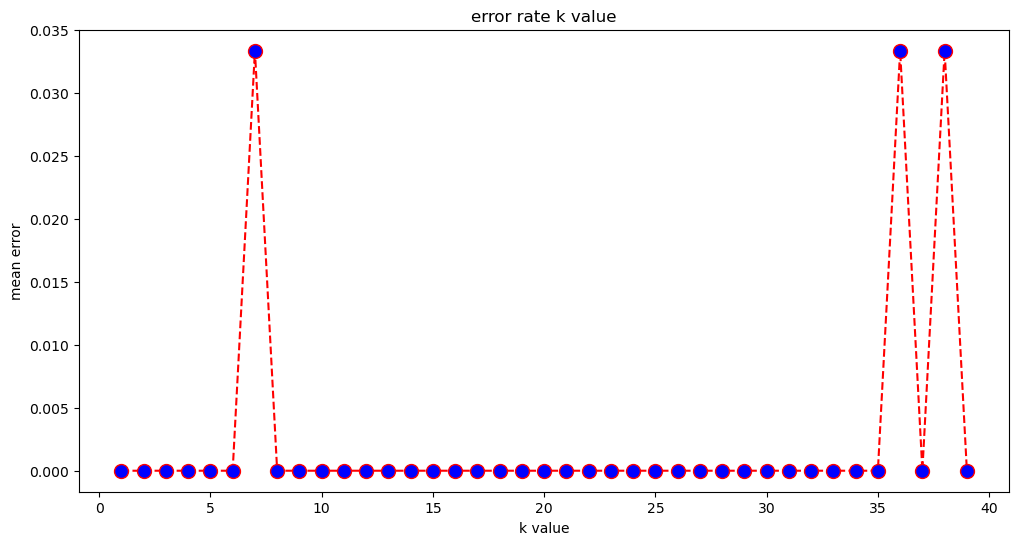

In [15]:
# k-plus proches voisins (KNN)
error= []
for i in  range(1,40):
    Classifier =KNeighborsClassifier(n_neighbors=i)
    Classifier.fit(X_train,y_train)
    pred_i=Classifier.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o', markerfacecolor='blue',markersize=10)
plt.title('error rate k value')
plt.xlabel('k value')
plt.ylabel('mean error')
plt.show()

In [17]:
y_pred=Classifier.predict(X_test)


In [18]:
from sklearn.metrics import  classification_report,confusion_matrix,accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print("Exactitude du modèle :", accuracy)

matrix=confusion_matrix(y_test,y_pred)
print("matrix de confusion:",matrix)

print(classification_report(y_test, y_pred))


Exactitude du modèle : 100.0
matrix de confusion: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Partie II : Decision Trees**

# **Questions :**

1- Importer les packages nécessaires

2- Lire l'ensemble de données dans le dataframe pandas

3- Afficher et explorer l'ensemble de données "**iris.csv**"

4- Extraire les variables d'entrée X

5- Extraire les variables de sortie y

6- Diviser le dataset en Train / Test

7- Mise à l'échelle des fonctionnalités avec Transform()

8- Définir votre modèle **Decision Tree**

9- Entraîner le modèle

10- Prédiction sur l'ensemble de test

11- Évaluation du modèle à l'aide de métriques

In [48]:
# IRIS Dataset : Decision Tree


# 1- Importer les packages nécessaires

# 2- Lire l'ensemble de données dans le dataframe pandas

# 3- Afficher et explorer l'ensemble de données "iris.csv"

# 4- Extraire les variables d'entrée X

# 5- Extraire les variables de sortie y

# 6- Diviser le dataset en Train / Test

# 7- Mise à l'échelle des fonctionnalités avec Transform()

# 8- Définir votre modèle KNN

# 9- Entraîner le modèle

# 10- Prédiction sur l'ensemble de test

# 11- Évaluation du modèle à l'aide de métriques

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
data = pd.read_csv('iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
X = data.drop('variety', axis=1) 
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y = data['variety']
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Appliquer le LabelEncoder à la variable dépendante
y = label_encoder.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=15, min_samples_split=30, min_samples_leaf=2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=30)

In [27]:
y_pred=decision_tree.predict(X_test)

In [28]:
from sklearn.metrics import  classification_report,confusion_matrix,accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print("Exactitude du modèle :", accuracy)

matrix=confusion_matrix(y_test,y_pred)
print("matrix de confusion:",matrix)

print(classification_report(y_test, y_pred))


Exactitude du modèle : 100.0
matrix de confusion: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

